In [8]:
import pandas as pd
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

SVM

In [9]:
def load_sentiment_data(directory="nusax/datasets/sentiment/"):
    """
    Load sentiment analysis data from NusaX dataset.
    Returns training, validation, and testing data along with labels for each language.
    
    Returns:
    dict: A dictionary with language keys ('indonesian', 'english', 'javanese').
            Each key contains another dictionary with keys 'train', 'valid', and 'test'.
            Each of these keys maps to a tuple of (tokenized_data, original_data), where:
                - tokenized_data: List of tokenized sentences in the corresponding language.
                - original_data: List of original sentences(in other words, not tokenized) in the corresponding language.
    
    Example usage:
        sentiment_data = load_sentiment_data()
        english_train_data = sentiment_data['english']['train']
        indonesian_valid_data = sentiment_data['indonesian']['valid']
        javanese_test_data = sentiment_data['javanese']['test']
    """
    languages = ["indonesian", "english", "javanese"]
    data = {}

    for lang in languages:
        lang_directory = directory + lang + "/"
        train_df = pd.read_csv(lang_directory + "train.csv")
        valid_df = pd.read_csv(lang_directory + "valid.csv")
        test_df = pd.read_csv(lang_directory + "test.csv")

        xtrain = [" ".join(word_tokenize(sent)) for sent in list(train_df['text'])]
        ytrain = list(train_df['label'])
        xvalid = [" ".join(word_tokenize(sent)) for sent in list(valid_df['text'])]
        yvalid = list(valid_df['label'])
        xtest = [" ".join(word_tokenize(sent)) for sent in list(test_df['text'])]
        ytest = list(test_df['label'])

        data[lang] = {
            "train": (xtrain, ytrain),
            "valid": (xvalid, yvalid),
            "test": (xtest, ytest)
        }
    
    return data

              precision    recall  f1-score   support

    negative       0.73      0.79      0.76        38
     neutral       0.68      0.71      0.69        24
    positive       0.85      0.76      0.81        38

    accuracy                           0.76       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.77      0.76      0.76       100



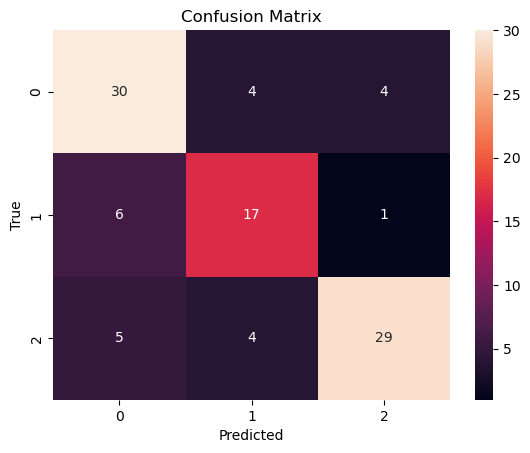

Accuracy on validation set: 0.76
Sentiment on the input text 'Saya sangat bahagia hari ini' is ['positive']
Sentiment on the input text 'Cuaca sangat buruk' is ['negative']
Sentiment on the input text 'Saya suka belajar bahasa' is ['negative']
Sentiment on the input text 'Ini adalah hari yang menyedihkan' is ['negative']


In [10]:
# sentiment_analysis_svm part
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# load sentiment analysis data
def load_sentiment_data(directory="nusax/datasets/sentiment/"):
    languages = ["indonesian", "english", "javanese"]
    data = {}

    for lang in languages:
        lang_directory = directory + lang + "/"
        train_df = pd.read_csv(lang_directory + "train.csv")
        valid_df = pd.read_csv(lang_directory + "valid.csv")
        test_df = pd.read_csv(lang_directory + "test.csv")

        xtrain = [" ".join(word_tokenize(sent)) for sent in list(train_df['text'])]
        ytrain = list(train_df['label'])
        xvalid = [" ".join(word_tokenize(sent)) for sent in list(valid_df['text'])]
        yvalid = list(valid_df['label'])
        xtest = [" ".join(word_tokenize(sent)) for sent in list(test_df['text'])]
        ytest = list(test_df['label'])

        data[lang] = {
            "train": (xtrain, ytrain),
            "valid": (xvalid, yvalid),
            "test": (xtest, ytest)
        }

    return data

# SVM training
def train_svm(X_train, y_train):
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    model = svm.SVC(kernel='linear')
    model.fit(X_train_tfidf, y_train)
    
    return model, vectorizer

# model evaluation
def evaluate_model(model, vectorizer, X_test, y_test):
    X_test_tfidf = vectorizer.transform(X_test)
    predictions = model.predict(X_test_tfidf)
    
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 实现情感分析的测试功能
from sklearn.metrics import accuracy_score

def test_sentiment_analysis(model, vectorizer, input_text):
    input_text = " ".join(word_tokenize(input_text))
    prediction = model.predict(vectorizer.transform([input_text]).toarray())
    return prediction

def evaluate_accuracy(model, vectorizer, X_test, y_test):
    predictions = model.predict(vectorizer.transform(X_test))
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# main 
if __name__ == "__main__":
    sentiment_data = load_sentiment_data()  # 加载情感分析数据
    X_train, y_train = sentiment_data['indonesian']['train']
    X_valid, y_valid = sentiment_data['indonesian']['valid']
    
    model, vectorizer = train_svm(X_train, y_train)
    evaluate_model(model, vectorizer, X_valid, y_valid)

    # accuracy
    accuracy = evaluate_accuracy(model, vectorizer, X_valid, y_valid)
    print(f"Accuracy on validation set: {accuracy:.2f}")

    # test function
    test_cases = [
        "Saya sangat bahagia hari ini",  # "I am very happy today"
        "Cuaca sangat buruk",            # "The weather is very bad"
        "Saya suka belajar bahasa",      # "I love learning languages"
        "Ini adalah hari yang menyedihkan" # "This is a sad day"
    ]

    for case in test_cases:
        sentiment = test_sentiment_analysis(model, vectorizer, case)
        print(f"Sentiment on the input text '{case}' is {sentiment}")

MLP

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              precision    recall  f1-score   support

    negative       0.77      0.79      0.78        38
     neutral       0.71      0.62      0.67        24
    positive       0.80      0.84      0.82        38

    accuracy                           0.77       100
   macro avg       0.76      0.75      0.76       100
weighted avg       0.77      0.77      0.77       100



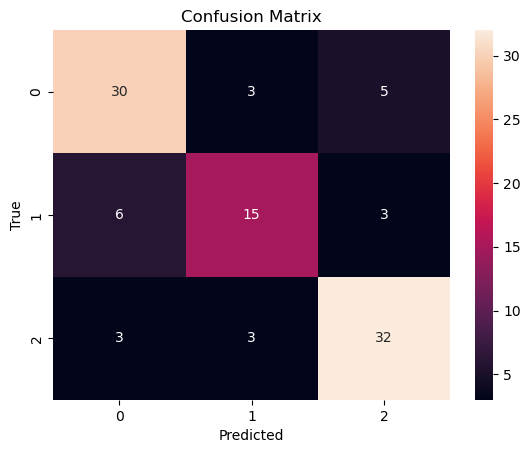

Accuracy on validation set: 0.77
Sentiment on the input text 'Saya sangat bahagia hari ini' is ['positive']
Sentiment on the input text 'Cuaca sangat buruk' is ['positive']
Sentiment on the input text 'Saya suka belajar bahasa' is ['negative']
Sentiment on the input text 'Ini adalah hari yang menyedihkan' is ['negative']


In [11]:
# sentiment_analysis_mlp part
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk


nltk.download('punkt')

# loading sentiment analysis data
def load_sentiment_data(directory="nusax/datasets/sentiment/"):
    languages = ["indonesian", "english", "javanese"]
    data = {}

    for lang in languages:
        lang_directory = directory + lang + "/"
        train_df = pd.read_csv(lang_directory + "train.csv")
        valid_df = pd.read_csv(lang_directory + "valid.csv")
        test_df = pd.read_csv(lang_directory + "test.csv")

        xtrain = [" ".join(word_tokenize(sent)) for sent in list(train_df['text'])]
        ytrain = list(train_df['label'])
        xvalid = [" ".join(word_tokenize(sent)) for sent in list(valid_df['text'])]
        yvalid = list(valid_df['label'])
        xtest = [" ".join(word_tokenize(sent)) for sent in list(test_df['text'])]
        ytest = list(test_df['label'])

        data[lang] = {
            "train": (xtrain, ytrain),
            "valid": (xvalid, yvalid),
            "test": (xtest, ytest)
        }

    return data

# mlp model training
def train_mlp(X_train, y_train):
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    model.fit(X_train_tfidf, y_train)
    
    return model, vectorizer

# model evaluation
def evaluate_model(model, vectorizer, X_test, y_test):
    X_test_tfidf = vectorizer.transform(X_test)
    predictions = model.predict(X_test_tfidf)
    
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 实现情感分析的测试功能
from sklearn.metrics import accuracy_score

def test_sentiment_analysis(model, vectorizer, input_text):
    input_text = " ".join(word_tokenize(input_text))
    prediction = model.predict(vectorizer.transform([input_text]).toarray())
    return prediction

def evaluate_accuracy(model, vectorizer, X_test, y_test):
    predictions = model.predict(vectorizer.transform(X_test))
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

if __name__ == "__main__":
    sentiment_data = load_sentiment_data()  # 加载情感分析数据
    X_train, y_train = sentiment_data['indonesian']['train']
    X_valid, y_valid = sentiment_data['indonesian']['valid']
    
    model, vectorizer = train_mlp(X_train, y_train)
    evaluate_model(model, vectorizer, X_valid, y_valid)

    # accuracy
    accuracy = evaluate_accuracy(model, vectorizer, X_valid, y_valid)
    print(f"Accuracy on validation set: {accuracy:.2f}")

    # test function
    test_cases = [
        "Saya sangat bahagia hari ini",  # "I am very happy today"
        "Cuaca sangat buruk",            # "The weather is very bad"
        "Saya suka belajar bahasa",      # "I love learning languages"
        "Ini adalah hari yang menyedihkan" # "This is a sad day"
    ]

    for case in test_cases:
        sentiment = test_sentiment_analysis(model, vectorizer, case)
        print(f"Sentiment on the input text '{case}' is {sentiment}")